# DAT 203 Assignment 10

- Author: Colin Bowers
- Date: July 22, 2003


1. Define mean shift clustering? 
1. Implement mean shift from the ground up. 
1. Use the make_blob function from previous assignment for testing. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 
import seaborn as sns

from sklearn.datasets import make_blobs
import random

In [2]:
def make_random_blobs(num_centers, center_sd):
    X, y = make_blobs(
        n_samples = 50, 
        centers = num_centers,
        random_state = 0, 
        cluster_std = center_sd
    )
    return X

In [5]:
#X = make_random_blobs(5, 0.4)
X = make_random_blobs(3, 0.3)
df = pd.DataFrame(X, columns=["feature1", "feature2"])

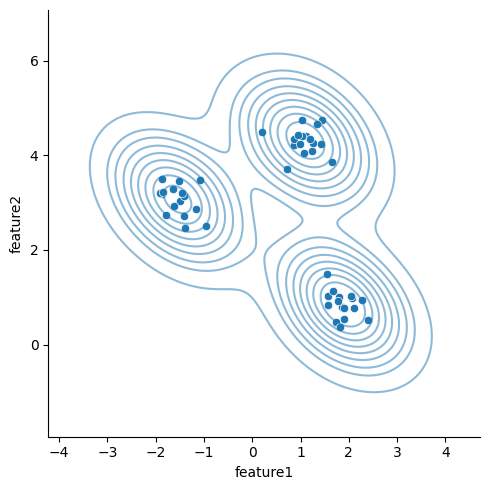

In [6]:
sns.displot(data=df, x="feature1", y="feature2", kind="kde", alpha=0.5)
sns.scatterplot(data=df, x="feature1", y="feature2")
plt.show()

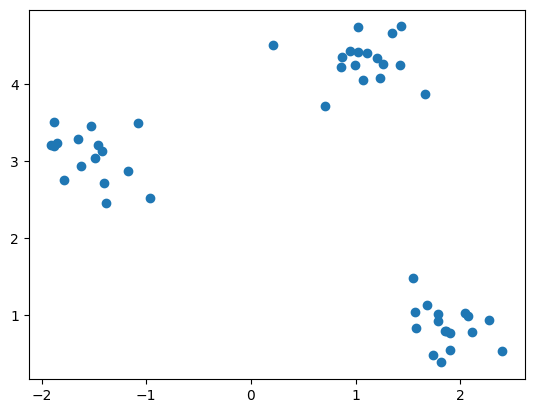

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## Shift Mean Algorithm

https://pythonprogramming.net/mean-shift-from-scratch-python-machine-learning-tutorial/

In [8]:
# given parameters
radius = 2
data = X

In [17]:

centroids = { }

for i in range(len(data)):
    centroids[i] = data[i]
    
while True:

    new_centroids = [ ]
    for i in centroids:
        in_bandwidth = [ ]
        centroid = centroids[i]

        #print(f"--- centroid={centroid} --------------")
        for pt in data:

            dist = np.linalg.norm(pt - centroid)

            #print(f"pt={pt}, dist={dist}")

            if dist < radius:
                in_bandwidth.append(pt)

        new_centroid = np.average(in_bandwidth, axis=0)
        new_centroids.append(tuple(new_centroid))

    uniques = sorted(list(set(new_centroids)))


    prev_centroids = dict(centroids)

    centroids = { }
    for i in range(len(uniques)):
        centroids[i] = np.array(uniques[i])

    done = True

    for i in centroids:
        if not np.array_equal(centroids[i], prev_centroids[i]):
            done = False
        if not done:
            break

    if done:
        break


print(centroids)
print(f" => done={done}")  

{0: array([-1.52961897,  3.06012502]), 1: array([1.08082737, 4.30912848]), 2: array([1.87684493, 0.84742309])}
 => done=True


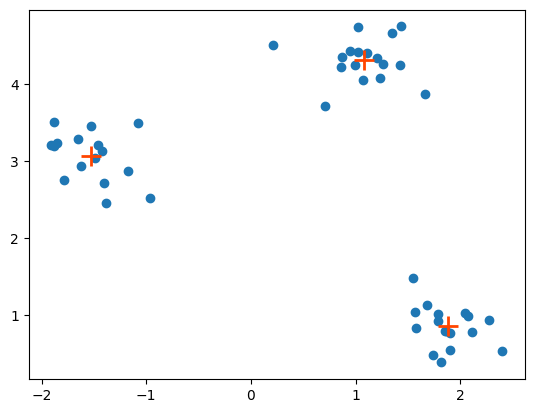

In [31]:
plt.scatter(x=df["feature1"], y=df["feature2"])
for c in centroids.values():
    plt.scatter(c[0], c[1], color='orangered', marker='+', s=200, lw=2)

plt.show()


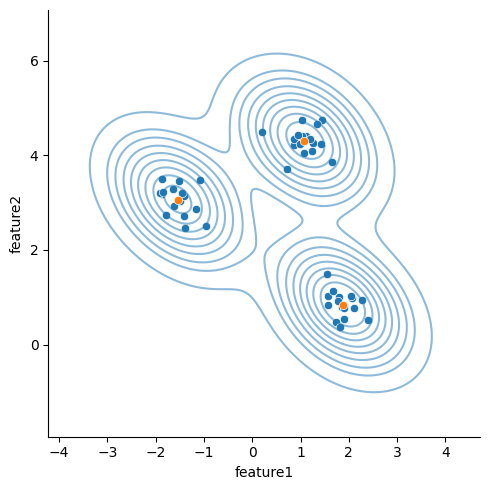

In [26]:
sns.displot(data=df, x="feature1", y="feature2", kind="kde", alpha=0.5)

sns.scatterplot(data=df, x="feature1", y="feature2")

df_centroids = pd.DataFrame(centroids.values(), columns=["X", "Y"])
sns.scatterplot(data=df_centroids, x="X", y="Y")

plt.show()